# Brightness and Contrast

When visualizing images in Jupyter notebooks it is important to show them in a way that a reader can see what we're writing about. Therefore, adjusting brightness and contrast is important. We can do this by modifying the _display range_, the range of displayed grey values.

For demonstration purposes we use the [cells3d example image of scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import cells3d

The `cells3d` dataset is a 4D-image. Using array-acces we extract a single 2D slice and show it.

In [2]:
image = cells3d()[30,0]
image.shape

(256, 256)

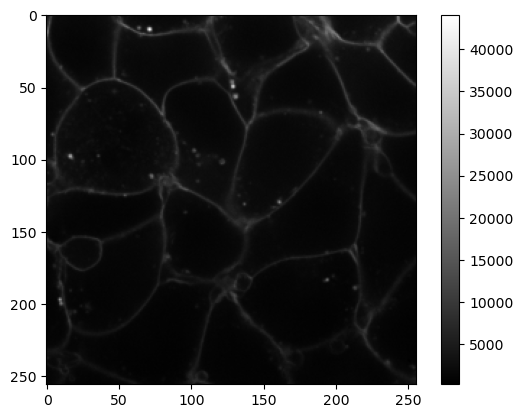

In [3]:
plt.imshow(image, cmap='gray')
plt.colorbar()

Notice that here the colorbar ranges from 0 to about 45000. The matplotlib `plt.imshow()` function adjusts the image contrast to the minimal and maximal values.

The minimal and maximal pixel values can also be obtained like this:

In [4]:
min_value = image.min()
max_value = image.max()
print('min value = ', min_value)
print('max value = ', max_value)

min value =  277
max value =  44092


If we want to increase brightness, i.e., the perception that the image is emitting more light, we can configure the display range by setting its minimum `vmin` and maximum `vmax`. This improves visibility of the membranes.

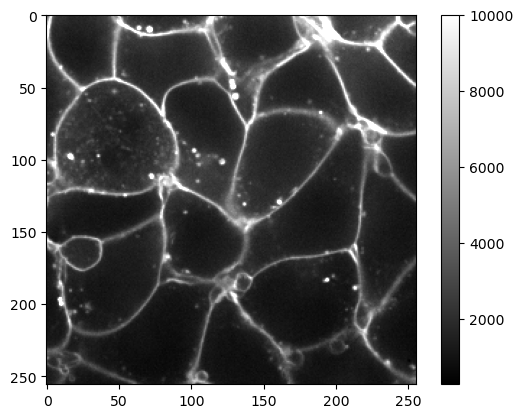

In [5]:
plt.imshow(image, cmap='gray', vmax=10000)
plt.colorbar()

## Adjusting visualization independent from the specific image
The next image we open may, or may not, have a similar grey-value range. Therefore, we could inspect the histogram of the image and guess a better threshold manually. 

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

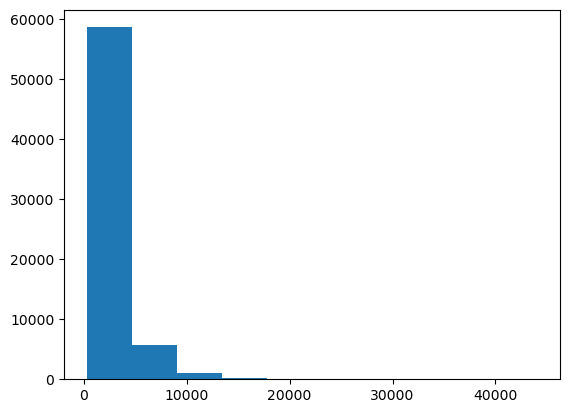

In [6]:
plt.hist(image.ravel())

Histograms of images are often shown with a [log-scale](https://en.wikipedia.org/wiki/Logarithmic_scale).

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

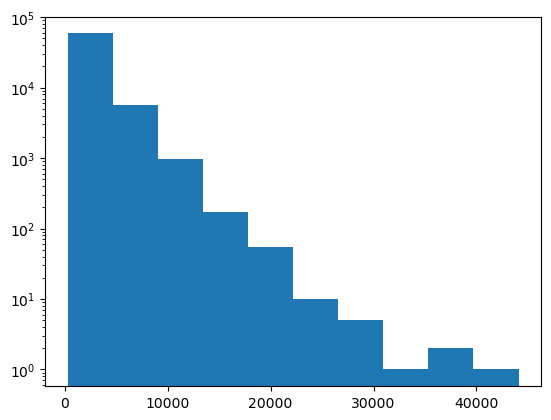

In [7]:
plt.hist(image.ravel(), log=True)

Obviously this image has a lot of dark grey values (< 20000) and little values > 40000.

It might make sense to configure the visualization using a percentage. Assume we want to visualize the image in a way so that 95% of the pixels are within range. We can do this using [numpy's percentile method](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html). We will also come back to percentiles by the end of the semester.

In [8]:
upper_limit = np.percentile(image, 95)
upper_limit

6580.0

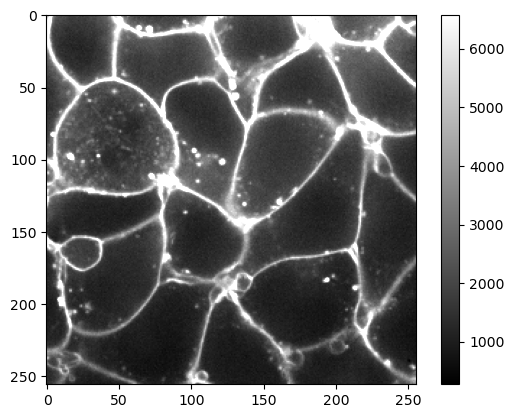

In [9]:
plt.imshow(image, cmap='gray', vmax=upper_limit)
plt.colorbar()

# Exercise

The `cells3d` dataset contains another channel showing the nuclei of the cells. Visualize it so that 99% of the lower grey values are visualized properly.

In [10]:
nuclei = cells3d()[30,1]
nuclei.shape

(256, 256)